In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("pp-complete.csv")

Data file comes from http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-complete.csv where the file is locally called "pp-complete.csv"

In [3]:
data.head()

,{680A511A-C9CD-4E26-84EC-B6697A53CEF8},122000,1995-09-29 00:00,NG14 5DE,D,N,F,14,Unnamed: 8,HILLCREST GARDENS,BURTON JOYCE,NOTTINGHAM,GEDLING,NOTTINGHAMSHIRE,A,A.1
0,{FC3888F4-0BE9-452F-A2EA-B66982729FAF},37000,1995-12-22 00:00,CV21 2JJ,T,N,F,18,NaN,JUBILEE STREET,RUGBY,RUGBY,RUGBY,WARWICKSHIRE,A,A
1,{024F306B-9F59-4D5F-8EE9-B6698ED0A538},93500,1995-07-27 00:00,UB8 2AP,D,N,F,7,NaN,WELLINGTON ROAD,UXBRIDGE,UXBRIDGE,HILLINGDON,GREATER LONDON,A,A
2,{4326AC9E-5FD9-47D1-AA48-B66993995051},32000,1995-03-03 00:00,HD6 4AD,T,N,F,121,NaN,BRADFORD ROAD,BRIGHOUSE,BRIGHOUSE,CALDERDALE,WEST YORKSHIRE,A,A
3,{B6BC448E-2915-4C44-8AE5-AF5978A922E4},38000,1995-09-08 00:00,B30 3PP,T,N,F,2,NaN,PARSONS HILL,BIRMINGHAM,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A
4,{CE6C6239-2FC3-4D72-829E-B69DD1A69868},29000,1995-08-04 00:00,WF15 7LY,S,N,F,100,NaN,ROBERTTOWN LANE,LIVERSEDGE,LIVERSEDGE,KIRKLEES,WEST YORKSHIRE,A,A


Here we can gete a glimpse of what the data looks like

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25107812 entries, 0 to 25107811
Data columns (total 16 columns):
 #   Column                                  Dtype 
---  ------                                  ----- 
 0   {680A511A-C9CD-4E26-84EC-B6697A53CEF8}  object
 1   122000                                  int64 
 2   1995-09-29 00:00                        object
 3   NG14 5DE                                object
 4   D                                       object
 5   N                                       object
 6   F                                       object
 7   14                                      object
 8   Unnamed: 8                              object
 9   HILLCREST GARDENS                       object
 10  BURTON JOYCE                            object
 11  NOTTINGHAM                              object
 12  GEDLING                                 object
 13  NOTTINGHAMSHIRE                         object
 14  A                                       object
 

Unfortunately it looks like the data is missing column names so they will have to be replaced with the correct column names which can be found here: https://www.gov.uk/guidance/about-the-price-paid-data#explanations-of-column-headers-in-theppd

In [5]:
data.columns = ['transaction_unique_id', 'price', 'date_of_transfer', 'postcode', 'property_type', 'old_or_new', 'duration', 'paon', 'saon', 'street', 'locality', 'town', 'district', 'county', 'ppd_category_type', 'record_status']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25107812 entries, 0 to 25107811
Data columns (total 16 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   transaction_unique_id  object
 1   price                  int64 
 2   date_of_transfer       object
 3   postcode               object
 4   property_type          object
 5   old_or_new             object
 6   duration               object
 7   paon                   object
 8   saon                   object
 9   street                 object
 10  locality               object
 11  town                   object
 12  district               object
 13  county                 object
 14  ppd_category_type      object
 15  record_status          object
dtypes: int64(1), object(15)
memory usage: 3.0+ GB


Now we have correct/reasonable column names for the data. This method comes at the expense of the first data point but it is the easiest way to accomplish this.

In [7]:
data.head()

,transaction_unique_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town,district,county,ppd_category_type,record_status
0,{FC3888F4-0BE9-452F-A2EA-B66982729FAF},37000,1995-12-22 00:00,CV21 2JJ,T,N,F,18,NaN,JUBILEE STREET,RUGBY,RUGBY,RUGBY,WARWICKSHIRE,A,A
1,{024F306B-9F59-4D5F-8EE9-B6698ED0A538},93500,1995-07-27 00:00,UB8 2AP,D,N,F,7,NaN,WELLINGTON ROAD,UXBRIDGE,UXBRIDGE,HILLINGDON,GREATER LONDON,A,A
2,{4326AC9E-5FD9-47D1-AA48-B66993995051},32000,1995-03-03 00:00,HD6 4AD,T,N,F,121,NaN,BRADFORD ROAD,BRIGHOUSE,BRIGHOUSE,CALDERDALE,WEST YORKSHIRE,A,A
3,{B6BC448E-2915-4C44-8AE5-AF5978A922E4},38000,1995-09-08 00:00,B30 3PP,T,N,F,2,NaN,PARSONS HILL,BIRMINGHAM,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A
4,{CE6C6239-2FC3-4D72-829E-B69DD1A69868},29000,1995-08-04 00:00,WF15 7LY,S,N,F,100,NaN,ROBERTTOWN LANE,LIVERSEDGE,LIVERSEDGE,KIRKLEES,WEST YORKSHIRE,A,A


This puts in proper column names- sacrificing the first data point.

In [8]:
data.describe()

,price
count,2.510781e+07
mean,1.972267e+05
std,8.019482e+05
min,1.000000e+00
25%,7.950000e+04
50%,1.390000e+05
75%,2.275000e+05
max,9.612500e+08


Breakdown of house prices from the data file

In [9]:
data["town"].value_counts()

LONDON           1950171
MANCHESTER        410961
BRISTOL           385902
BIRMINGHAM        370045
NOTTINGHAM        328755
                  ...   
LLANRHYSTYD            8
PORT DINORWIC          5
THORNHILL              1
KELSO                  1
BIGGAR                 1
Name: town, Length: 1171, dtype: int64

As one can see the town/city with the highest amount of purchases is London. The other cities are far behind

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x17ddc1f98>]],
      dtype=object)

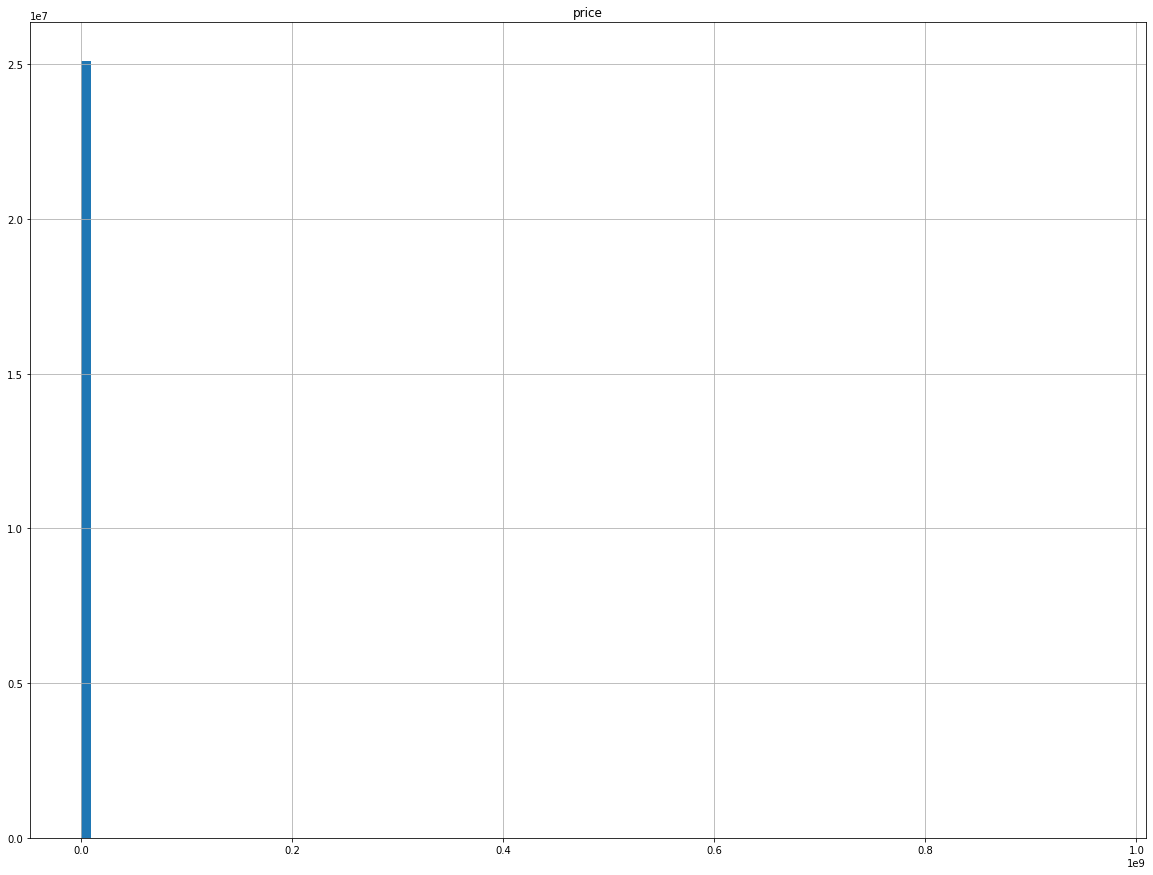

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=100, figsize=(20,15))

The histogram makes it visually clear that the distribution of house prices contains major outliers... We will come back to this later

In [11]:
data.query('date_of_transfer.str.contains("2015")')

,transaction_unique_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town,district,county,ppd_category_type,record_status
20009161,{25EA59FA-4331-4D50-E050-A8C0630562D0},130000,2015-10-23 00:00,NE29 0RX,T,N,F,77,NaN,TUDOR AVENUE,NaN,NORTH SHIELDS,NORTH TYNESIDE,TYNE AND WEAR,A,A
20009162,{25EA59FA-4332-4D50-E050-A8C0630562D0},97500,2015-11-03 00:00,SR4 0AX,T,N,F,13,NaN,FORDHAM ROAD,NaN,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
20009163,{25EA59FA-4333-4D50-E050-A8C0630562D0},95000,2015-10-30 00:00,NE2 4DE,F,N,L,10A,NaN,VICTORIA SQUARE,NaN,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE,TYNE AND WEAR,A,A
20009164,{25EA59FA-4334-4D50-E050-A8C0630562D0},115000,2015-10-12 00:00,NE40 3HA,T,N,L,41,NaN,SILVERMERE DRIVE,NaN,RYTON,GATESHEAD,TYNE AND WEAR,A,A
20009165,{25EA59FA-4335-4D50-E050-A8C0630562D0},85000,2015-10-20 00:00,SR4 0ES,S,N,F,17,NaN,PRESCOT ROAD,NaN,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21018852,{288DCE29-62DE-E510-E050-A8C06205480E},330000,2015-09-11 00:00,SK6 6BX,D,N,F,5A,NaN,LIME KILN LANE,MARPLE,STOCKPORT,STOCKPORT,GREATER MANCHESTER,A,A
21018853,{288DCE29-62E0-E510-E050-A8C06205480E},280000,2015-10-01 00:00,WA14 5UP,T,N,F,6,NaN,TURNBULL ROAD,WEST TIMPERLEY,ALTRINCHAM,TRAFFORD,GREATER MANCHESTER,A,A
21018854,{288DCE29-62E2-E510-E050-A8C06205480E},133500,2015-08-07 00:00,M22 5LE,F,N,L,5,APARTMENT 49,SHEEN GARDENS,NaN,MANCHESTER,MANCHESTER,GREATER MANCHESTER,A,A
21018855,{288DCE29-62E4-E510-E050-A8C06205480E},145000,2015-08-19 00:00,M4 7BL,F,N,L,2,APARTMENT 417,MALTA STREET,NaN,MANCHESTER,MANCHESTER,GREATER MANCHESTER,A,A


One way to query the data to find only the test data.

In [12]:
test_set = data.query('date_of_transfer.str.contains("2015")')

In [13]:
data.query('~date_of_transfer.str.contains("2015")')

,transaction_unique_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town,district,county,ppd_category_type,record_status
0,{FC3888F4-0BE9-452F-A2EA-B66982729FAF},37000,1995-12-22 00:00,CV21 2JJ,T,N,F,18,NaN,JUBILEE STREET,RUGBY,RUGBY,RUGBY,WARWICKSHIRE,A,A
1,{024F306B-9F59-4D5F-8EE9-B6698ED0A538},93500,1995-07-27 00:00,UB8 2AP,D,N,F,7,NaN,WELLINGTON ROAD,UXBRIDGE,UXBRIDGE,HILLINGDON,GREATER LONDON,A,A
2,{4326AC9E-5FD9-47D1-AA48-B66993995051},32000,1995-03-03 00:00,HD6 4AD,T,N,F,121,NaN,BRADFORD ROAD,BRIGHOUSE,BRIGHOUSE,CALDERDALE,WEST YORKSHIRE,A,A
3,{B6BC448E-2915-4C44-8AE5-AF5978A922E4},38000,1995-09-08 00:00,B30 3PP,T,N,F,2,NaN,PARSONS HILL,BIRMINGHAM,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A
4,{CE6C6239-2FC3-4D72-829E-B69DD1A69868},29000,1995-08-04 00:00,WF15 7LY,S,N,F,100,NaN,ROBERTTOWN LANE,LIVERSEDGE,LIVERSEDGE,KIRKLEES,WEST YORKSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25107807,{9DBAD221-CB27-6EB3-E053-6B04A8C0F257},220000,2020-01-10 00:00,HU8 0LX,D,N,F,131,NaN,INGS ROAD,NaN,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A,A
25107808,{9DBAD221-CB28-6EB3-E053-6B04A8C0F257},185000,2020-01-09 00:00,DN37 9QX,D,N,F,31,NaN,THE CLOISTERS,NaN,GRIMSBY,NORTH EAST LINCOLNSHIRE,NORTH EAST LINCOLNSHIRE,A,A
25107809,{9DBAD221-CB35-6EB3-E053-6B04A8C0F257},155000,2020-01-21 00:00,DN32 0DF,S,N,F,3,NaN,LANSDOWNE AVENUE,NaN,GRIMSBY,NORTH EAST LINCOLNSHIRE,NORTH EAST LINCOLNSHIRE,A,A
25107810,{9DBAD221-CB36-6EB3-E053-6B04A8C0F257},44000,2020-01-10 00:00,HU5 3HH,F,N,L,125,FLAT 6,PRINCES AVENUE,NaN,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A,A


Given the description of the data set is FULL Price Paid 1995-2015 one would assume that the data set ONLY contains data from 1995 to 2015. However if you look at the bottom of this query of what is _supposed_ to be only training data between 1995-2014 (inclusive) one can see that the data set also includes homes purchased in 2020. Does this mean that it also contains homes purchased in 2016, 2017, 2018, and 2019?

In [14]:
data.query('date_of_transfer.str.contains("2016")')

,transaction_unique_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town,district,county,ppd_category_type,record_status
21018857,{2FD36065-5A6F-4BF8-E050-A8C0620562B1},143000,2016-03-18 00:00,BH1 3EF,F,N,L,GRANGE COURT,FLAT 17,GERVIS ROAD,NaN,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,A,A
21018858,{2FD36065-5A70-4BF8-E050-A8C0620562B1},173000,2016-02-29 00:00,BH1 4QS,F,N,L,2A,NaN,LINCOLN AVENUE,SPRINGBOURNE,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,A,A
21018859,{2FD36065-5A71-4BF8-E050-A8C0620562B1},150000,2016-02-29 00:00,DT4 7JQ,T,N,F,4,NaN,PENNY STREET,NaN,WEYMOUTH,WEYMOUTH AND PORTLAND,DORSET,A,A
21018860,{2FD36065-5A72-4BF8-E050-A8C0620562B1},1500000,2016-02-19 00:00,BH14 8LQ,D,N,F,60,NaN,BROWNSEA VIEW AVENUE,NaN,POOLE,POOLE,POOLE,A,A
21018861,{2FD36065-5A73-4BF8-E050-A8C0620562B1},231000,2016-03-11 00:00,BH8 8QZ,S,N,F,92,NaN,SHELBOURNE ROAD,NaN,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,B,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062930,{42A5A70A-0F58-56E8-E050-A8C06205331E},135000,2016-10-20 00:00,CW1 3GJ,T,N,F,2,NaN,CHASSAGNE SQUARE,NaN,CREWE,CHESHIRE EAST,CHESHIRE EAST,B,A
22062931,{42A5A70A-0F59-56E8-E050-A8C06205331E},210000,2016-11-15 00:00,ST7 2EW,O,N,F,1,NaN,CREWE ROAD,ALSAGER,STOKE-ON-TRENT,CHESHIRE EAST,CHESHIRE EAST,B,A
22062932,{42A5A70A-0F5B-56E8-E050-A8C06205331E},315000,2016-11-15 00:00,SK11 7RL,O,N,F,113,NaN,LONDON ROAD,NaN,MACCLESFIELD,CHESHIRE EAST,CHESHIRE EAST,B,A
22062933,{42A5A70A-0F5C-56E8-E050-A8C06205331E},945000,2016-10-25 00:00,CW9 5LR,O,N,F,"CHARLES BARBER AND SONS LTD, 1 - 11",NaN,STATION ROAD,NaN,NORTHWICH,CHESHIRE WEST AND CHESTER,CHESHIRE WEST AND CHESTER,B,A


*IT DOES!!* Now we will have to filter out all the data that is not supposed to be in this data set (i.e. all data past 2015). We will also have to make a training set of data 1995-2014 (inclusive) and a test set of all data in 2015

In [15]:
from datetime import datetime

In [16]:
data['date_of_transfer'] = pd.to_datetime(data['date_of_transfer'], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25107812 entries, 0 to 25107811
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   transaction_unique_id  object        
 1   price                  int64         
 2   date_of_transfer       datetime64[ns]
 3   postcode               object        
 4   property_type          object        
 5   old_or_new             object        
 6   duration               object        
 7   paon                   object        
 8   saon                   object        
 9   street                 object        
 10  locality               object        
 11  town                   object        
 12  district               object        
 13  county                 object        
 14  ppd_category_type      object        
 15  record_status          object        
dtypes: datetime64[ns](1), int64(1), object(14)
memory usage: 3.0+ GB


This converts the unassigned data transfer object into a datetime object. This allows dates of purchases to be compared against each other hence making it possible to separate the data points by date ranges.

In [17]:
exclusion_date_thresh = '2016-01-01'
exclusion_data_mask = (data['date_of_transfer'] >= exclusion_date_thresh)
exclusion_data = data.loc[exclusion_data_mask]
exclusion_data

,transaction_unique_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town,district,county,ppd_category_type,record_status
21018857,{2FD36065-5A6F-4BF8-E050-A8C0620562B1},143000,2016-03-18,BH1 3EF,F,N,L,GRANGE COURT,FLAT 17,GERVIS ROAD,NaN,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,A,A
21018858,{2FD36065-5A70-4BF8-E050-A8C0620562B1},173000,2016-02-29,BH1 4QS,F,N,L,2A,NaN,LINCOLN AVENUE,SPRINGBOURNE,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,A,A
21018859,{2FD36065-5A71-4BF8-E050-A8C0620562B1},150000,2016-02-29,DT4 7JQ,T,N,F,4,NaN,PENNY STREET,NaN,WEYMOUTH,WEYMOUTH AND PORTLAND,DORSET,A,A
21018860,{2FD36065-5A72-4BF8-E050-A8C0620562B1},1500000,2016-02-19,BH14 8LQ,D,N,F,60,NaN,BROWNSEA VIEW AVENUE,NaN,POOLE,POOLE,POOLE,A,A
21018861,{2FD36065-5A73-4BF8-E050-A8C0620562B1},231000,2016-03-11,BH8 8QZ,S,N,F,92,NaN,SHELBOURNE ROAD,NaN,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,B,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25107807,{9DBAD221-CB27-6EB3-E053-6B04A8C0F257},220000,2020-01-10,HU8 0LX,D,N,F,131,NaN,INGS ROAD,NaN,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A,A
25107808,{9DBAD221-CB28-6EB3-E053-6B04A8C0F257},185000,2020-01-09,DN37 9QX,D,N,F,31,NaN,THE CLOISTERS,NaN,GRIMSBY,NORTH EAST LINCOLNSHIRE,NORTH EAST LINCOLNSHIRE,A,A
25107809,{9DBAD221-CB35-6EB3-E053-6B04A8C0F257},155000,2020-01-21,DN32 0DF,S,N,F,3,NaN,LANSDOWNE AVENUE,NaN,GRIMSBY,NORTH EAST LINCOLNSHIRE,NORTH EAST LINCOLNSHIRE,A,A
25107810,{9DBAD221-CB36-6EB3-E053-6B04A8C0F257},44000,2020-01-10,HU5 3HH,F,N,L,125,FLAT 6,PRINCES AVENUE,NaN,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A,A


In [18]:
training_data_thresh = '2015-01-01'
training_data_mask = (data['date_of_transfer'] < training_data_thresh)
training_data = data.loc[training_data_mask]
training_data

,transaction_unique_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town,district,county,ppd_category_type,record_status
0,{FC3888F4-0BE9-452F-A2EA-B66982729FAF},37000,1995-12-22,CV21 2JJ,T,N,F,18,NaN,JUBILEE STREET,RUGBY,RUGBY,RUGBY,WARWICKSHIRE,A,A
1,{024F306B-9F59-4D5F-8EE9-B6698ED0A538},93500,1995-07-27,UB8 2AP,D,N,F,7,NaN,WELLINGTON ROAD,UXBRIDGE,UXBRIDGE,HILLINGDON,GREATER LONDON,A,A
2,{4326AC9E-5FD9-47D1-AA48-B66993995051},32000,1995-03-03,HD6 4AD,T,N,F,121,NaN,BRADFORD ROAD,BRIGHOUSE,BRIGHOUSE,CALDERDALE,WEST YORKSHIRE,A,A
3,{B6BC448E-2915-4C44-8AE5-AF5978A922E4},38000,1995-09-08,B30 3PP,T,N,F,2,NaN,PARSONS HILL,BIRMINGHAM,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A
4,{CE6C6239-2FC3-4D72-829E-B69DD1A69868},29000,1995-08-04,WF15 7LY,S,N,F,100,NaN,ROBERTTOWN LANE,LIVERSEDGE,LIVERSEDGE,KIRKLEES,WEST YORKSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20009156,{5E7B7B6C-5CAA-4BC6-B1D2-F1C65C4B3B8E},186000,2014-08-08,BH11 8EJ,S,N,F,5,NaN,MACLEAN ROAD,NaN,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,A,A
20009157,{41785BDC-04AF-429F-8E72-F5551D124E93},140000,2014-06-19,NN17 5EY,F,Y,F,4,NaN,ELTON STREET,NaN,CORBY,CORBY,NORTHAMPTONSHIRE,A,A
20009158,{C13614D4-F3EF-4735-8E15-F5551F4ECAB0},354500,2014-01-23,WD17 4PU,T,N,F,50,NaN,CHURCH ROAD,NaN,WATFORD,WATFORD,HERTFORDSHIRE,A,A
20009159,{ED1516B3-E122-4052-8D34-F5552DFB7712},125000,2014-11-06,FY3 9JR,S,N,F,339,NaN,WHITEGATE DRIVE,NaN,BLACKPOOL,BLACKPOOL,BLACKPOOL,A,A


This is the separated training data

In [19]:
testing_data_thresh = '2015-01-01'
testing_data_end = '2015-12-31'
testing_data_mask = ((data['date_of_transfer'] >= testing_data_thresh) & (data['date_of_transfer'] <= testing_data_end))
testing_data = data.loc[testing_data_mask]
testing_data

,transaction_unique_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town,district,county,ppd_category_type,record_status
20009161,{25EA59FA-4331-4D50-E050-A8C0630562D0},130000,2015-10-23,NE29 0RX,T,N,F,77,NaN,TUDOR AVENUE,NaN,NORTH SHIELDS,NORTH TYNESIDE,TYNE AND WEAR,A,A
20009162,{25EA59FA-4332-4D50-E050-A8C0630562D0},97500,2015-11-03,SR4 0AX,T,N,F,13,NaN,FORDHAM ROAD,NaN,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
20009163,{25EA59FA-4333-4D50-E050-A8C0630562D0},95000,2015-10-30,NE2 4DE,F,N,L,10A,NaN,VICTORIA SQUARE,NaN,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE,TYNE AND WEAR,A,A
20009164,{25EA59FA-4334-4D50-E050-A8C0630562D0},115000,2015-10-12,NE40 3HA,T,N,L,41,NaN,SILVERMERE DRIVE,NaN,RYTON,GATESHEAD,TYNE AND WEAR,A,A
20009165,{25EA59FA-4335-4D50-E050-A8C0630562D0},85000,2015-10-20,SR4 0ES,S,N,F,17,NaN,PRESCOT ROAD,NaN,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21018852,{288DCE29-62DE-E510-E050-A8C06205480E},330000,2015-09-11,SK6 6BX,D,N,F,5A,NaN,LIME KILN LANE,MARPLE,STOCKPORT,STOCKPORT,GREATER MANCHESTER,A,A
21018853,{288DCE29-62E0-E510-E050-A8C06205480E},280000,2015-10-01,WA14 5UP,T,N,F,6,NaN,TURNBULL ROAD,WEST TIMPERLEY,ALTRINCHAM,TRAFFORD,GREATER MANCHESTER,A,A
21018854,{288DCE29-62E2-E510-E050-A8C06205480E},133500,2015-08-07,M22 5LE,F,N,L,5,APARTMENT 49,SHEEN GARDENS,NaN,MANCHESTER,MANCHESTER,GREATER MANCHESTER,A,A
21018855,{288DCE29-62E4-E510-E050-A8C06205480E},145000,2015-08-19,M4 7BL,F,N,L,2,APARTMENT 417,MALTA STREET,NaN,MANCHESTER,MANCHESTER,GREATER MANCHESTER,A,A


This is the separated testing data.

In [20]:
training_data["property_type"].value_counts()

T    6206859
S    5587566
D    4610738
F    3586236
O      17762
Name: property_type, dtype: int64

Comparing the distribution fo property types between the training and testing data

In [21]:
testing_data["property_type"].value_counts()

T    294433
S    254408
D    236150
F    205169
O     19536
Name: property_type, dtype: int64

In [22]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
training_cat = training_data[["property_type"]]
training_cat_1hot = cat_encoder.fit_transform(training_cat)
training_cat_1hot

<20009161x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20009161 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
testing_cat = testing_data[["property_type"]]
testing_cat_1hot = cat_encoder.fit_transform(testing_cat)
testing_cat_1hot

<1009696x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1009696 stored elements in Compressed Sparse Row format>

Testing using OneHotEncoder on the categorical feature property_type

In [24]:
training_data['is_london'] = np.where(training_data.town.str.contains("LONDON"), 1, 0)
training_data

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,transaction_unique_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town,district,county,ppd_category_type,record_status,is_london
0,{FC3888F4-0BE9-452F-A2EA-B66982729FAF},37000,1995-12-22,CV21 2JJ,T,N,F,18,NaN,JUBILEE STREET,RUGBY,RUGBY,RUGBY,WARWICKSHIRE,A,A,0
1,{024F306B-9F59-4D5F-8EE9-B6698ED0A538},93500,1995-07-27,UB8 2AP,D,N,F,7,NaN,WELLINGTON ROAD,UXBRIDGE,UXBRIDGE,HILLINGDON,GREATER LONDON,A,A,0
2,{4326AC9E-5FD9-47D1-AA48-B66993995051},32000,1995-03-03,HD6 4AD,T,N,F,121,NaN,BRADFORD ROAD,BRIGHOUSE,BRIGHOUSE,CALDERDALE,WEST YORKSHIRE,A,A,0
3,{B6BC448E-2915-4C44-8AE5-AF5978A922E4},38000,1995-09-08,B30 3PP,T,N,F,2,NaN,PARSONS HILL,BIRMINGHAM,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A,0
4,{CE6C6239-2FC3-4D72-829E-B69DD1A69868},29000,1995-08-04,WF15 7LY,S,N,F,100,NaN,ROBERTTOWN LANE,LIVERSEDGE,LIVERSEDGE,KIRKLEES,WEST YORKSHIRE,A,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20009156,{5E7B7B6C-5CAA-4BC6-B1D2-F1C65C4B3B8E},186000,2014-08-08,BH11 8EJ,S,N,F,5,NaN,MACLEAN ROAD,NaN,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,A,A,0
20009157,{41785BDC-04AF-429F-8E72-F5551D124E93},140000,2014-06-19,NN17 5EY,F,Y,F,4,NaN,ELTON STREET,NaN,CORBY,CORBY,NORTHAMPTONSHIRE,A,A,0
20009158,{C13614D4-F3EF-4735-8E15-F5551F4ECAB0},354500,2014-01-23,WD17 4PU,T,N,F,50,NaN,CHURCH ROAD,NaN,WATFORD,WATFORD,HERTFORDSHIRE,A,A,0
20009159,{ED1516B3-E122-4052-8D34-F5552DFB7712},125000,2014-11-06,FY3 9JR,S,N,F,339,NaN,WHITEGATE DRIVE,NaN,BLACKPOOL,BLACKPOOL,BLACKPOOL,A,A,0


Created a new binary feature for whether or not a property is in London.

In [25]:
testing_data['is_london'] = np.where(testing_data.town.str.contains("LONDON"), 1, 0)
testing_data

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,transaction_unique_id,price,date_of_transfer,postcode,property_type,old_or_new,duration,paon,saon,street,locality,town,district,county,ppd_category_type,record_status,is_london
20009161,{25EA59FA-4331-4D50-E050-A8C0630562D0},130000,2015-10-23,NE29 0RX,T,N,F,77,NaN,TUDOR AVENUE,NaN,NORTH SHIELDS,NORTH TYNESIDE,TYNE AND WEAR,A,A,0
20009162,{25EA59FA-4332-4D50-E050-A8C0630562D0},97500,2015-11-03,SR4 0AX,T,N,F,13,NaN,FORDHAM ROAD,NaN,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A,0
20009163,{25EA59FA-4333-4D50-E050-A8C0630562D0},95000,2015-10-30,NE2 4DE,F,N,L,10A,NaN,VICTORIA SQUARE,NaN,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE,TYNE AND WEAR,A,A,0
20009164,{25EA59FA-4334-4D50-E050-A8C0630562D0},115000,2015-10-12,NE40 3HA,T,N,L,41,NaN,SILVERMERE DRIVE,NaN,RYTON,GATESHEAD,TYNE AND WEAR,A,A,0
20009165,{25EA59FA-4335-4D50-E050-A8C0630562D0},85000,2015-10-20,SR4 0ES,S,N,F,17,NaN,PRESCOT ROAD,NaN,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21018852,{288DCE29-62DE-E510-E050-A8C06205480E},330000,2015-09-11,SK6 6BX,D,N,F,5A,NaN,LIME KILN LANE,MARPLE,STOCKPORT,STOCKPORT,GREATER MANCHESTER,A,A,0
21018853,{288DCE29-62E0-E510-E050-A8C06205480E},280000,2015-10-01,WA14 5UP,T,N,F,6,NaN,TURNBULL ROAD,WEST TIMPERLEY,ALTRINCHAM,TRAFFORD,GREATER MANCHESTER,A,A,0
21018854,{288DCE29-62E2-E510-E050-A8C06205480E},133500,2015-08-07,M22 5LE,F,N,L,5,APARTMENT 49,SHEEN GARDENS,NaN,MANCHESTER,MANCHESTER,GREATER MANCHESTER,A,A,0
21018855,{288DCE29-62E4-E510-E050-A8C06205480E},145000,2015-08-19,M4 7BL,F,N,L,2,APARTMENT 417,MALTA STREET,NaN,MANCHESTER,MANCHESTER,GREATER MANCHESTER,A,A,0


Added this feature to the testing data as well.

In [26]:
training_data = training_data.drop(['transaction_unique_id', 'date_of_transfer', 'postcode',  'old_or_new', 'paon', 'saon', 'street', 'locality', 'town', 'district', 'county', 'ppd_category_type', 'record_status'], axis=1)

Getting rid of the unnecessary columns. The assignment is to predict price from property type, duration, and whether or not the property is in London. This means all other columns are unnecessary.

In [27]:
training_labels = training_data['price'] #save labels in training_labels
training_data_noLabels = training_data.drop(['price'], axis=1) #separate the labels from the features here
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
cat_attribs = ['property_type', 'duration']
pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(), cat_attribs),
    ])
training_data_prepared = pipeline.fit_transform(training_data_noLabels)
training_data_prepared #labelless and prepared!

<20009161x8 sparse matrix of type '<class 'numpy.float64'>'
	with 40018322 stored elements in Compressed Sparse Row format>

Property type and duration need to be encoded for the learning algorithms. This can be done with OneHotEncoder. I also created a pipeline in order to do this so I can also transform the testing set later on. The features of the training data are now stored in training_data_prepared and the labels are now stored in training_labels

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(training_data_prepared, training_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

First model I am going to try is the Linear Regression model. This uses the training examples to find parameters of a linear regression to best fit the data.

In [29]:
some_data = training_data_noLabels.iloc[:5]
some_labels = training_labels.iloc[:5]
some_data_prepared = pipeline.transform(some_data)
some_predictions = lin_reg.predict(some_data_prepared).round()
print("Predictions:", some_predictions)

Predictions: [130170. 236164. 130170. 130170. 142388.]


These are predictions of the first 5 training data points.

In [30]:
print("Labels:", list(some_labels))

Labels: [37000, 93500, 32000, 38000, 29000]


Yeah... does not look great. The first 5 actual house prices seem far off from what the linear model predicts off of their corresponding features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x154a8d278>]],
      dtype=object)

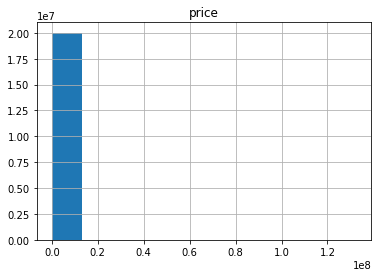

In [31]:
training_data.hist(column='price')

Perhaps this shows major outliers in data... try to see what data looks like without outliers

In [32]:
import scipy.stats as stats
z_scores = stats.zscore(training_data['price'])

abs_z_scores = np.abs(z_scores)
print(np.where(abs_z_scores>3))

(array([    3193,     4897,     6351, ..., 20009056, 20009132, 20009138]),)


Yes, some major outliers. This shows that some of these data points are a ridiculous amount of standard deviations away from the mean. For a regular data set only data within 3 standard deviations from the mean are usually considered. This can also be seen as within 99% of the quantile.

In [33]:
upper_thresh = training_data['price'].quantile(0.99) #threshold for the highest prices in the training data

training_data_wo_outliers = training_data[training_data['price'] < upper_thresh]
training_data_wo_outliers

,price,property_type,duration,is_london
0,37000,T,F,0
1,93500,D,F,0
2,32000,T,F,0
3,38000,T,F,0
4,29000,S,F,0
...,...,...,...,...
20009156,186000,S,F,0
20009157,140000,F,F,0
20009158,354500,T,F,0
20009159,125000,S,F,0


20009161 - 19807794 = 201367 outlier homes. Now let's see what the data looks like without these homes.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cd25cf8>]],
      dtype=object)

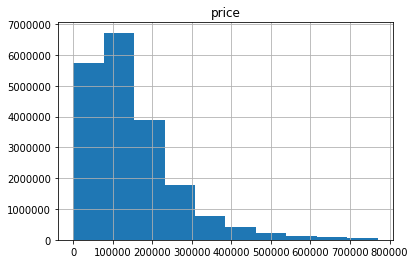

In [34]:
training_data_wo_outliers.hist(column='price')

Better... still skewed left. Now let's see if this helps the performance of a linear regression model.

In [35]:
training_data_prepared_no_outliers = training_data_wo_outliers.drop(['price'], axis=1)
training_data_prepared_no_outliers = pipeline.fit_transform(training_data_wo_outliers)
training_data_prepared_no_outliers

<19807794x8 sparse matrix of type '<class 'numpy.float64'>'
	with 39615588 stored elements in Compressed Sparse Row format>

Prepare a training set for fitting with no outliers

In [36]:
training_labels_wo_outliers = training_data_wo_outliers['price']

lin_reg_2 = LinearRegression()
lin_reg_2.fit(training_data_prepared_no_outliers, training_labels_wo_outliers)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
some_data = training_data_wo_outliers.iloc[:5]
some_labels = training_labels_wo_outliers.iloc[:5]
some_data_prepared = pipeline.transform(some_data)
some_predictions = lin_reg_2.predict(some_data_prepared).round()
print("Predictions:", some_predictions)

Predictions: [120951. 215275. 120951. 120951. 137770.]


In [38]:
print("Labels:", list(some_labels))

Labels: [37000, 93500, 32000, 38000, 29000]


Also not great from the naked eye but it seems a little bit. Let's now look at Root Mean Squared Error. Mean Absolute Error might give us a better insight to error if we included the outlier data but given that we are excluding the outliers we will measure the performance of our model(s) on Root Mean Squared Error (RMSE)

In [39]:
from sklearn.metrics import mean_squared_error

price_predictions = lin_reg.predict(training_data_prepared_no_outliers)
lin_mse = mean_squared_error(training_labels_wo_outliers, price_predictions)
lin_rmse = np.sqrt(lin_mse)
np.round(lin_rmse)

116078.0

This means the typical prediction error is about £116,6078. This means that the model is underfitting the training data given the features. In order to fix this we could use more features however given the constraints of this practical we will not do that at this time.

In [40]:
training_labels_wo_outliers.median()

122750.0

In [41]:
np.round(lin_rmse)/training_labels_wo_outliers.median()

0.9456456211812627

Clearly this linear regression model does not make good predictions. The model is off by almost the median value. Now let's try Decision Tree and Random Forest Regressors as they are more complex models.

First, a Decision Tree Regressor will help us find and complex and nonlinear relationships in the data.

In [42]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(training_data_prepared_no_outliers, training_labels_wo_outliers)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [43]:
price_predictions = tree_reg.predict(training_data_prepared_no_outliers)
tree_mse = mean_squared_error(training_labels_wo_outliers, price_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

107004.62247416601

This is seriously underfitting but at least a little bit better than the linear RMSE (107004 < 116078). Let's compare them through cross-validation

In [44]:
from sklearn.model_selection import cross_val_score
K = 10
scores = cross_val_score(tree_reg, training_data_prepared_no_outliers, training_labels_wo_outliers, scoring="neg_mean_squared_error", cv=K)
tree_rmse_scores = np.sqrt(-scores)

In [45]:
def display_scores(scores):
    print("Scores:", np.round(scores))
    print("Mean:", np.round(scores.mean()))
    print("Standard deviation:", np.round(scores.std()))
    
display_scores(tree_rmse_scores)

Scores: [104493.  99462.  94842.  90980.  90576.  98834. 110811. 121475. 132475.
 144755.]
Mean: 108870.0
Standard deviation: 17514.0


In [46]:
lin_scores = cross_val_score(lin_reg_2, training_data_prepared_no_outliers, training_labels_wo_outliers, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [104450.  99453.  94891.  91065.  90695.  98919. 110900. 121563. 132606.
 144931.]
Mean: 108947.0
Standard deviation: 17547.0


One can see that the Decision Tree Regressor performs a TINY bit better than the Linear Regression Model. Now we can try the Random Forest Model. The Random Forest Model works by training many Decision Trees on random subsets of features then averages out the predictions. This is an example of Ensemble Learning where models are built on top of each other.

In [47]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=20, random_state=42)
forest_reg.fit(training_data_prepared_no_outliers, training_labels_wo_outliers)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

It was taking so long to compute so I populated the forest with only 20 trees.

In [48]:
price_predictions = forest_reg.predict(training_data_prepared_no_outliers)
forest_mse = mean_squared_error(training_labels_wo_outliers, price_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse.round()

107005.0

Looks about the same as the Decision Tree Regressor. Let's look at the cross-validation:

In [49]:
forest_scores = cross_val_score(forest_reg, training_data_prepared_no_outliers, training_labels_wo_outliers, scoring="neg_mean_squared_error", cv=4)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [114910.  93025. 112399. 142356.]
Mean: 115672.0
Standard deviation: 17580.0


It seems like the Decision Tree Regressor might be a better way to go. Maybe if the random forest was populated with more trees it would give a more accurate prediction. However because they are so close and I am strapped for computational power I will go with Decision Tree Regressor at the moment. With more time and computational power I would probably try more iterations of Random Forest.

As the Decision Tree Regressor has some paramaters that can be tuned, I will be using a RandomizedSearchCV to fine-tune a Decision Tree Regressor model to find the best setting of parameters.

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9)}

tree_reg = DecisionTreeRegressor(random_state=42)

random_search = RandomizedSearchCV(tree_reg, param_dist, cv=5, scoring='neg_mean_squared_error', pre_dispatch=10)

random_search.fit(training_data_prepared_no_outliers, training_labels_wo_outliers)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=42,
                                                   splitter='best'),
                   iid='dep

In [51]:
final_model = random_search.best_estimator_
final_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Now to test... first we must prepare the test data. This is apparently the best model made from our 10 job iterations.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1225d9fd0>]],
      dtype=object)

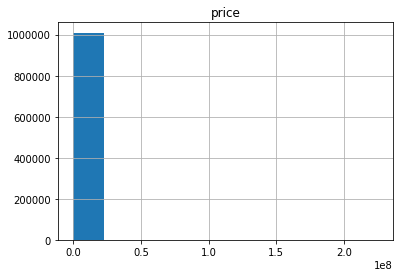

In [54]:
testing_data = testing_data.drop(['transaction_unique_id', 'date_of_transfer', 'postcode',  'old_or_new', 'paon', 'saon', 'street', 'locality', 'town', 'district', 'county', 'ppd_category_type', 'record_status'], axis=1)
testing_data.hist(column='price')

I should probably adjust the testing data for outliers as well.

In [67]:
upper_thresh = testing_data['price'].quantile(0.99)

testing_data_wo_outliers = testing_data[testing_data['price'] < upper_thresh] #Remove outliers outside 3 std deviations
testing_data_wo_outliers

,price,property_type,duration,is_london
20009161,130000,T,F,0
20009162,97500,T,F,0
20009163,95000,F,L,0
20009164,115000,T,L,0
20009165,85000,S,F,0
...,...,...,...,...
21018852,330000,D,F,0
21018853,280000,T,F,0
21018854,133500,F,L,0
21018855,145000,F,L,0


In [68]:
testing_data_wo_outliers_labels = testing_data_wo_outliers['price']
testing_data_wo_outliers_prepared = testing_data_wo_outliers.drop(['price'], axis=1)
testing_data_wo_outliers_prepared = pipeline.transform(testing_data_wo_outliers)


Removed outliers from the testing data, separated labels from features, and ran the testing data through the same pipeline as the training data in order to encode the property_type and duration categorical features.

In [69]:
final_predictions = final_model.predict(testing_data_wo_outliers_prepared)

In [70]:
final_mse = mean_squared_error(testing_data_wo_outliers_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

208041.37727577944

The RMSE of the final model on the testing data is about 208041. This is much more than the RMSE on the training data (almost double) and could be due to a number of factors. Some of these factors would include unaccounted differences between the testing and training data (why would 2015 house prices cost significantly more/less than 1995-2014 house prices), the model may have not been the best chosen (this could be due to the lack of computational power to find a more complex random forest), and the RandomizedSearchCV being restricted in order to also save computational power.

As we acknowledge better results could most likely be found by using more features, having more computational power, and acknowledging differences between the training and testing data... we will move forward to further measure the accuracy of our final Decision Tree Model.

In [71]:
final_rmse/testing_data_wo_outliers_labels.mean()

0.816116769615362

The final RMSE is almost equal to the mean price.

In [72]:
SE = (final_predictions - testing_data_wo_outliers_labels) ** 2
SFE = SE.divide(testing_data_wo_outliers_labels**2)
MSFE = SFE.mean()
RMSFE = np.sqrt(MSFE)
RMSFE

4.453485909385299

The predictions are off by a magnitude of about 4.45

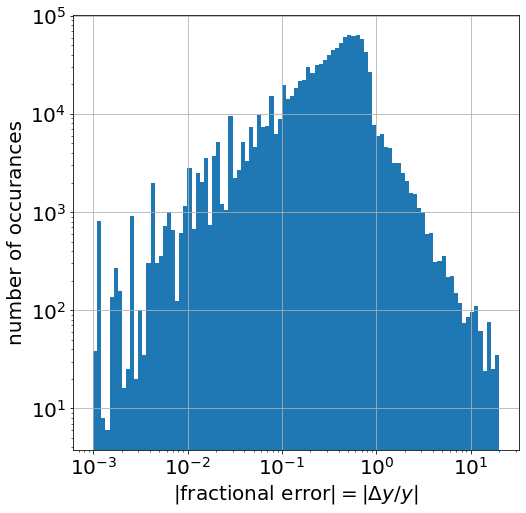

In [73]:
FEN = np.abs(final_predictions - testing_data_wo_outliers_labels)
FED = np.abs(testing_data_wo_outliers_labels)
FE = FEN.divide(FED)
logbins = np.logspace(-3,1.3,100)
ax = FE.hist(bins=logbins, figsize=(8,8))
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel("|fractional error|$ = |\Delta y / y |$",size=20)
plt.xticks(fontsize=20)
plt.ylabel("number of occurances",size=20)
plt.yticks(fontsize=20)
plt.show()

Fractional error is pretty high everywhere.